In [1]:
# -*- coding: utf-8 -*-
# -*- author : Lokman Mheni - Fabio Palmisano -*-
# -*- date : 2024-04-20 -*-
# -*- Last revision: 2024-05-14 *-
# -*- python version : 3.11.9 -*-
# -*- Description: Notebook containing the project of NML 2024-*-

# <center> EE - 452: Network Machine Learning </center>
## <center> Ecole Polytechnique Fédérale de Lausanne </center>
### <center>Bookreads recommenders </center>
---

In [1]:
import numpy as np
import pandas as pd
import networkx as nx
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

from itertools import combinations
from collections import defaultdict
from tqdm import tqdm

#!pip install grakel
from grakel import GraphKernel
from grakel.utils import graph_from_networkx
from tqdm import tqdm

ratings = pd.read_csv( 'data/ratings.csv' )
tr = pd.read_csv( 'data/to_read.csv' )
b = pd.read_csv( 'data/books.csv' )

t = pd.read_csv( 'data/tags.csv' )
bt = pd.read_csv( 'data/book_tags.csv')

# Data Preprocessing

In [3]:
# Ratings data
ratings.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


<Axes: >

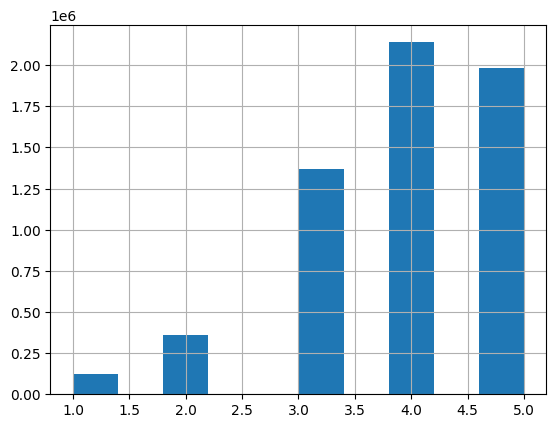

In [4]:
ratings['rating'].hist()

In [5]:
len(ratings)

5976479

In [6]:
# Pint the top 10 books of ratings
ratings['book_id'].value_counts().head(10)


book_id
1     22806
2     21850
4     19088
3     16931
5     16604
17    16549
20    15953
18    15855
23    15657
7     15558
Name: count, dtype: int64

In [7]:
#Print the top 10 user_id with more ratings 
ratings['user_id'].value_counts()

user_id
12874    200
30944    200
52036    199
12381    199
28158    199
        ... 
32128     21
40753     21
51725     21
43675     20
34590     19
Name: count, Length: 53424, dtype: int64

In [8]:
# take last 10 elements of ratings['user_id'].value_counts().head(10)
ratings['user_id'].value_counts().tail(10)


user_id
32960    22
22020    22
25258    22
42736    22
43672    22
32128    21
40753    21
51725    21
43675    20
34590    19
Name: count, dtype: int64

In [9]:
# Create an empty graph
#G = nx.Graph()

# Iterate over the 'tr' DataFrame and add edges between users who added the same book to 'to read'
#for _, row in tqdm(tr.iterrows(), total=len(tr)):
#    book_id = row['book_id']
#    user_id = row['user_id']
    
    # Get all users who added the same book to 'to read'
#    same_book_users = tr[tr['book_id'] == book_id]['user_id'].tolist()
    
    # Add edges between the current user and all other users who added the same book
#    for other_user in same_book_users:
#        if user_id != other_user:
#            G.add_edge(user_id, other_user)

# Plot the graph
#nx.draw(G, with_labels=True)

# Graph Creation

##  User to User graph

In [10]:
ratings.book_id.value_counts().head(10)

book_id
1     22806
2     21850
4     19088
3     16931
5     16604
17    16549
20    15953
18    15855
23    15657
7     15558
Name: count, dtype: int64

In [12]:
# Populate the dictionary
book_users = defaultdict(set)
for _, row in tqdm(ratings.iterrows(), total=ratings.shape[0]):
    book_users[row['book_id']].add(row['user_id'])

  0%|          | 0/5976479 [00:00<?, ?it/s]

100%|██████████| 5976479/5976479 [02:20<00:00, 42674.23it/s]


In [13]:
#Check the keys of the dictionnary with the most users
max(book_users, key=lambda x: len(book_users[x]))

1

In [14]:
# Quickest 
import pandas as pd
import networkx as nx
from itertools import combinations
from collections import defaultdict
from tqdm import tqdm

# Sample because it's taking too long

r = ratings.sample(frac=0.1)
# Create a dictionary where the keys are book_ids and the values are sets of user_ids
book_users = defaultdict(set)

# Populate the dictionary
for _, row in tqdm(r.iterrows(), total=r.shape[0]):
    book_users[row['book_id']].add(row['user_id'])

# Create an empty graph
graph = nx.Graph()

# Iterate over each book
for book_id, users in tqdm(book_users.items(), total=len(book_users)):
    # Generate all pairs of users for this book
    user_pairs = combinations(users, 2)
    
    # Add edges between all pairs of users
    for user_pair in user_pairs:
        graph.add_edge(*user_pair)

# Print the number of nodes and edges in the graph
print(len(graph.nodes()))
print(len(graph.edges()))

100%|██████████| 10000/10000 [04:04<00:00, 40.83it/s]


53395
92798491


Each user that rated a book has potentially 53395 connections, but the maximum of books that are rated is 200. So the maximum total of edges would be    200 * 53395 * 53395

In [15]:
graph.nodes()

NodeView((26625, 51205, 24583, 43017, 40971, 22546, 34871, 41016, 16440, 47160, 34875, 32832, 51264, 16450, 28739, 10309, 73, 4170, 47187, 16474, 2145, 2146, 22629, 43113, 111, 47217, 16498, 22651, 53379, 22660, 28803, 14470, 10375, 2183, 4238, 8336, 34962, 39063, 4250, 2204, 32929, 8355, 171, 37037, 14518, 18616, 194, 47301, 4296, 18633, 8403, 32988, 24798, 30948, 14564, 35048, 26856, 41194, 35050, 28909, 26862, 26863, 43248, 20724, 39158, 6398, 14593, 16644, 26889, 41230, 39190, 30998, 2331, 51484, 12592, 28985, 33083, 317, 39230, 14669, 49485, 45391, 10582, 16731, 51553, 20835, 49511, 16744, 49521, 43377, 31090, 43382, 35194, 10618, 16765, 20865, 45445, 29066, 39312, 51603, 24980, 27028, 35223, 37275, 16797, 43430, 33196, 31153, 20914, 37298, 45497, 51641, 25020, 8636, 16832, 22982, 25034, 12751, 8658, 39379, 12755, 31191, 2525, 31198, 20968, 33262, 31218, 31220, 14840, 23035, 14847, 39427, 16902, 31243, 23056, 27153, 43547, 39452, 18974, 49712, 47666, 43571, 29235, 14903, 2618, 571

In [16]:
ratings.query('user_id == 12874')

,user_id,book_id,rating
786481,12874,306,4
786482,12874,118,4
786483,12874,43,4
786484,12874,943,3
786485,12874,1186,4
...,...,...,...
786728,12874,846,4
786730,12874,4974,4
786731,12874,4244,3
786733,12874,189,4


Mean degree for the first 10 nodes: 9.0
Mean degree for the first 20 nodes: 19.0
Mean degree for the first 30 nodes: 29.0


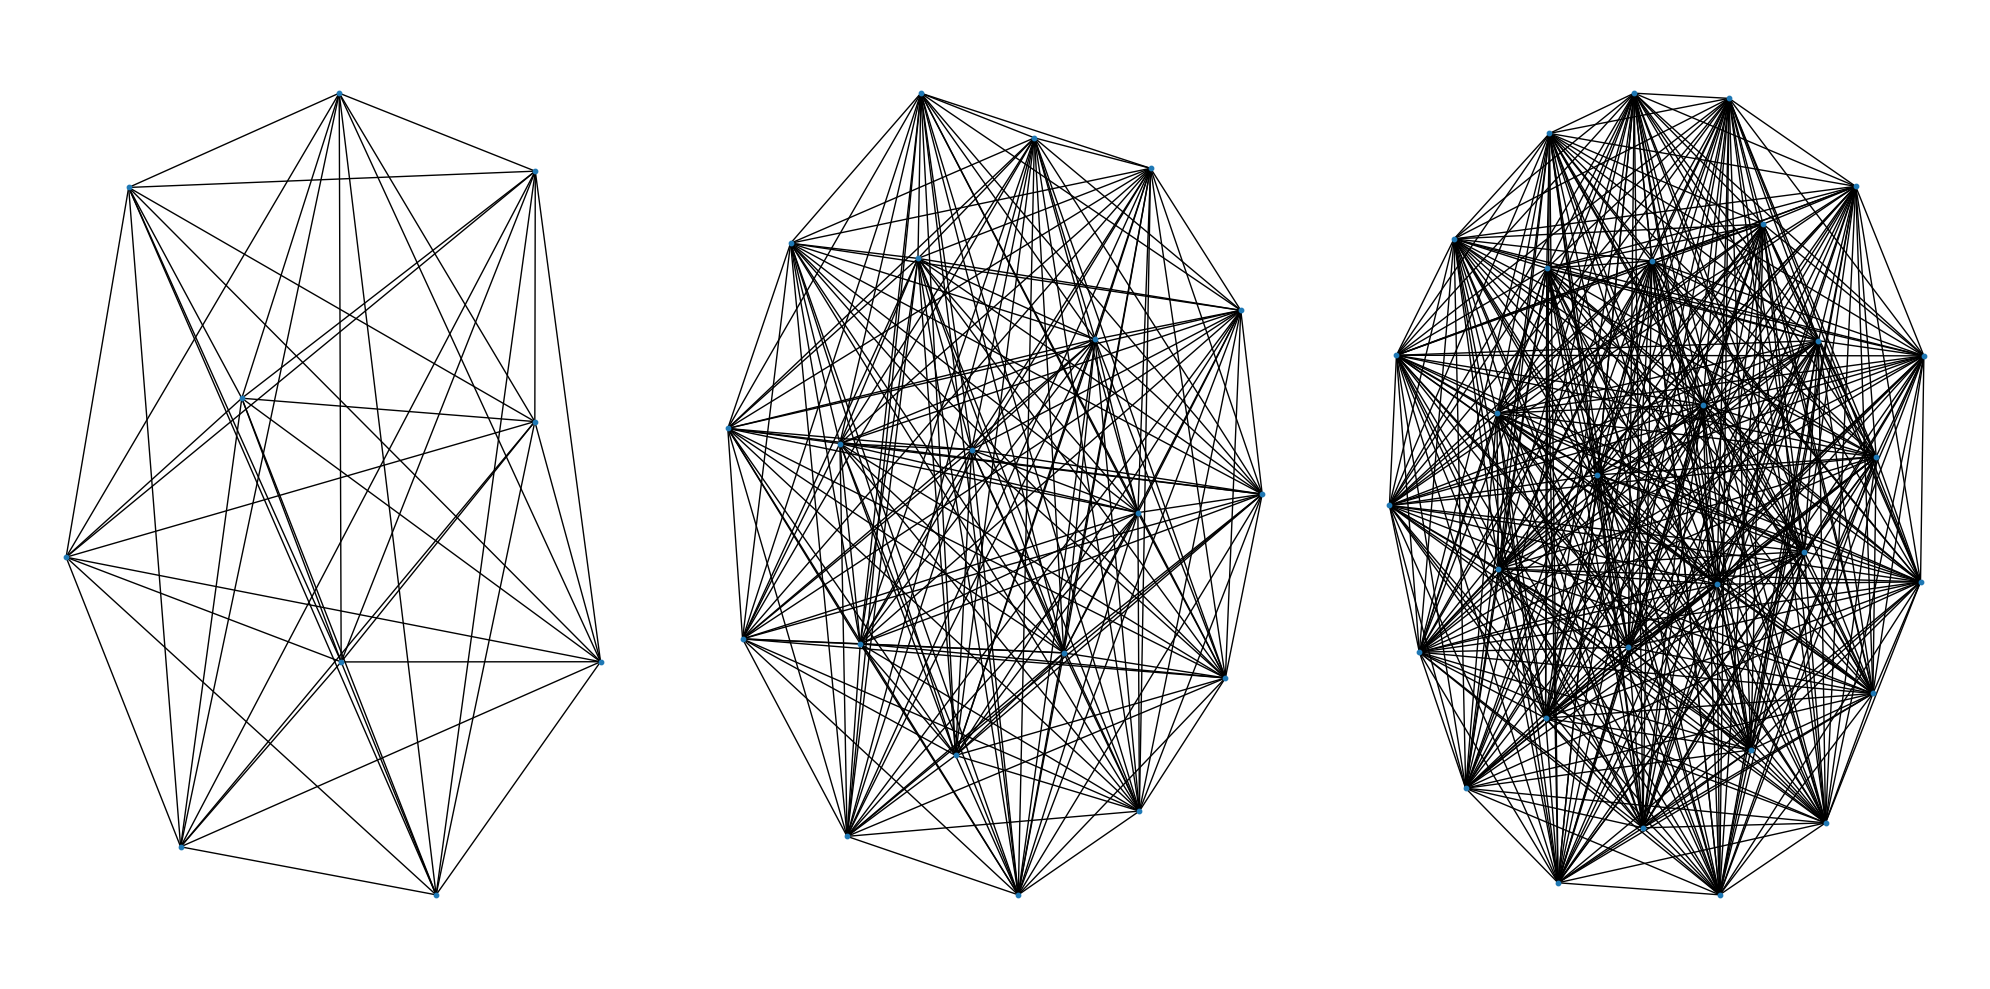

In [17]:
import matplotlib.pyplot as plt

# Set up the figure and the grid of subplots
plt.figure(figsize=(20, 10))


sampled_nodes = list(graph.nodes())[:10]

# Iterate over the first 9 subplots
for i in range(3):
    # Get the first 10 * (i + 1) nodes
    sampled_nodes = list(graph.nodes())[:10 * (i + 1)]
    
    # Create a subgraph with the sampled nodes
    sampled_graph = graph.subgraph(sampled_nodes)

    degree = dict(sampled_graph.degree())
    mean_degree = np.mean(list(degree.values()))
    print(f"Mean degree for the first {len(sampled_nodes)} nodes: {mean_degree}")
    
    # Draw the subgraph and print the mean degree of the nodes present in this sampled graph

    
    plt.subplot(1, 3, i + 1)
    

    nx.draw(sampled_graph, with_labels=False, node_size=10)

plt.tight_layout()
plt.show()


Mean degree for the first 10 nodes: 0.2
Mean degree for the first 10 nodes: 0.4
Mean degree for the first 10 nodes: 0.2


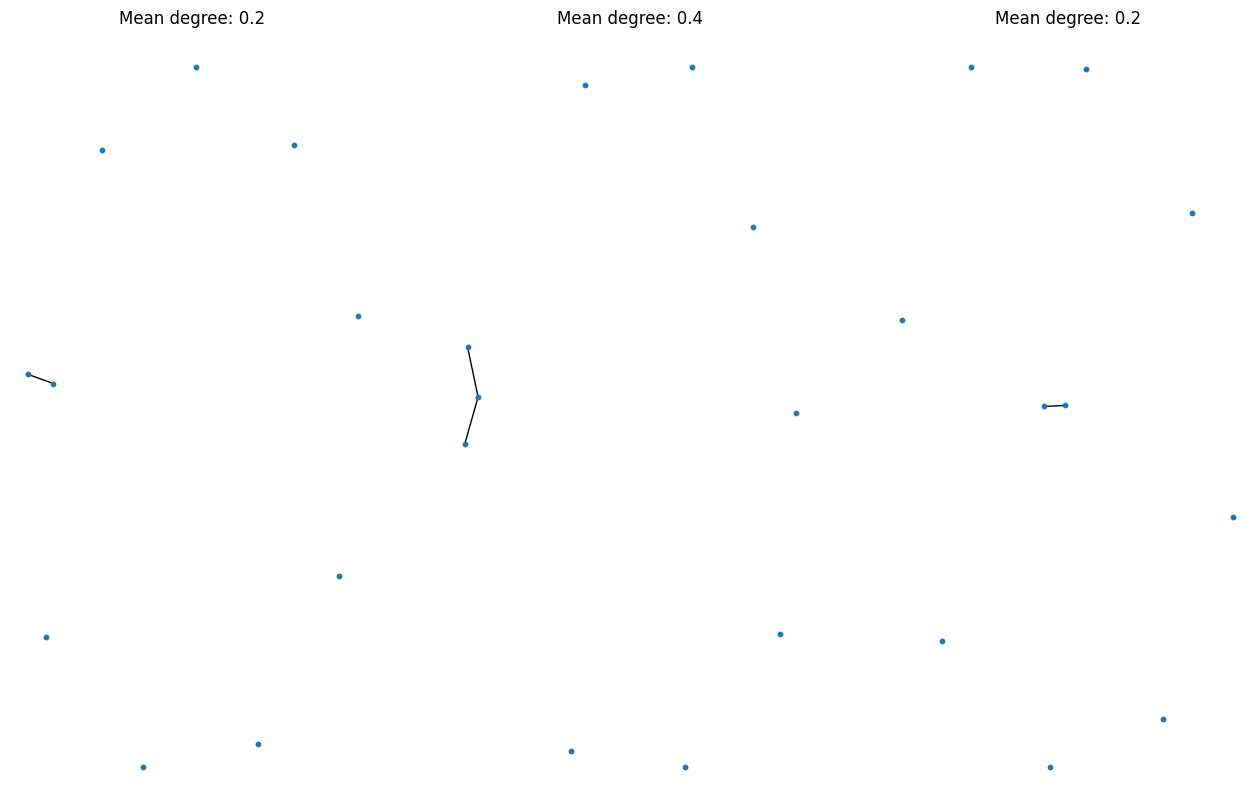

In [18]:
# Plot random subgraph (random nodes) not the first then as above
plt.figure(figsize=(16, 10))

# Iterate over the first 9 subplots
for i in range(3):
    # Take 10 randoms nodes
    sampled_nodes = list(graph.nodes())
    np.random.shuffle(sampled_nodes)
    sampled_nodes = sampled_nodes[:10]

    
    # Create a subgraph with the sampled nodes
    sampled_graph = graph.subgraph(sampled_nodes)

    degree = dict(sampled_graph.degree())
    mean_degree = np.mean(list(degree.values()))
    print(f"Mean degree for the first {len(sampled_nodes)} nodes: {mean_degree}")
    
    # Draw the subgraph and print the mean degree of the nodes present in this sampled graph
    #Put title for each subplot
    plt.subplot(1, 3, i + 1)
    plt.title(f"Mean degree: {mean_degree}")
    nx.draw(sampled_graph, with_labels=False, node_size=10)

In [19]:
# Calculate the mean degree of the nodes in the graph
degree = dict(graph.degree())
mean_degree = np.mean(list(degree.values()))
print(f"Mean degree: {mean_degree}")


Mean degree: 3475.924374941474


In [20]:
# Take the last element of ratings['book_id'].value_counts()
ratings['book_id'].value_counts().index[-1]

7803

In [21]:
# The user (34590) with less ratings
ratings.query('user_id == 34590')

,user_id,book_id,rating
3456860,34590,2033,4
3456861,34590,2292,4
3474484,34590,6198,3
3474485,34590,127,4
3476800,34590,6625,5
3476812,34590,6723,5
3476814,34590,8855,4
3476819,34590,4171,4
3507023,34590,8634,4
3536987,34590,619,5


In [22]:
# degree of nodes 28672 (most rating's user_id)
print("Degree for the most rating's user_id: " ,degree[28672])

# Check the node degree of node 34590 (less rating's user_id)
print("Degree for the less rating's user_id: " ,degree[34590])


Degree for the most rating's user_id:  3223
Degree for the less rating's user_id:  9


In [23]:
degree = dict(graph.degree())

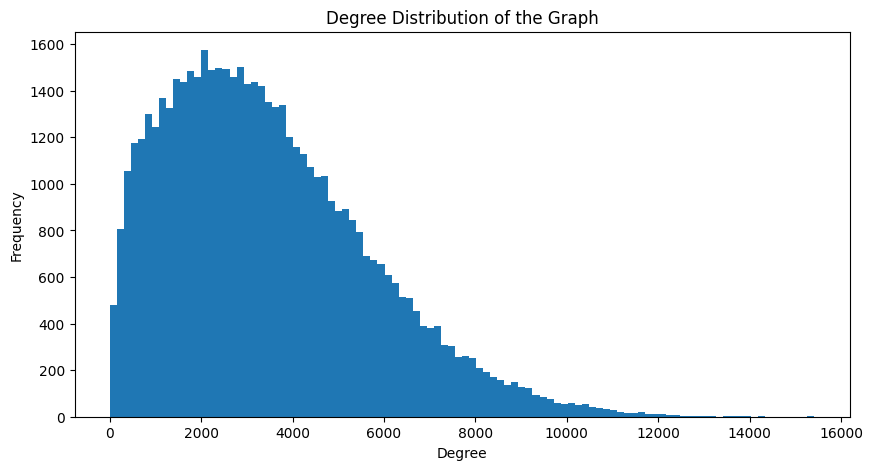

In [24]:
# Plot the degree distribution of the graph (in continous form)
plt.figure(figsize=(10, 5))
plt.hist(degree.values(), bins=100)
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution of the Graph')
plt.show()

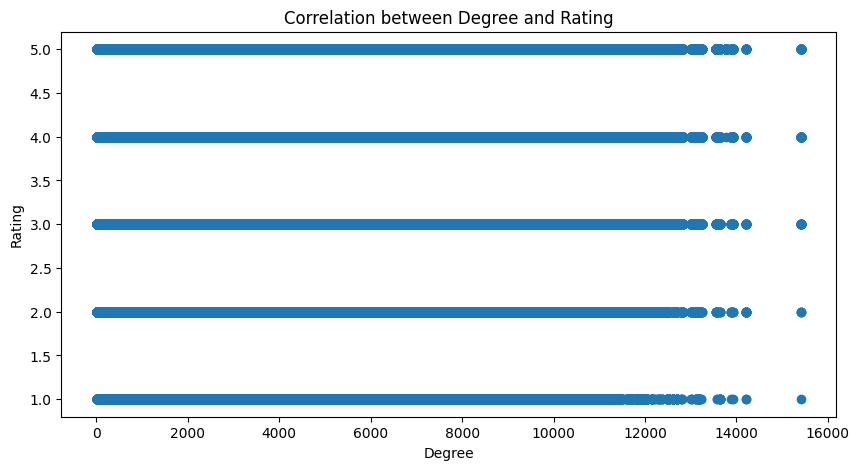

In [25]:
## Is the degree really representative of properties of the nodes in the graph? (Correlation between degree and ratings)
# Create a DataFrame with the degree of each node
degree_df = pd.DataFrame(list(degree.items()), columns=['node', 'degree'])

# Merge the degree DataFrame with the 'ratings' DataFrame
ratings_with_degree = ratings.merge(degree_df, left_on='user_id', right_on='node')

# Calculate the correlation between the degree of the nodes and the ratings
ratings_with_degree[['rating', 'degree']].corr()

# Plot results of the correlation
plt.figure(figsize=(10, 5))
plt.scatter(ratings_with_degree['degree'], ratings_with_degree['rating'])
plt.xlabel('Degree')
plt.ylabel('Rating')
plt.title('Correlation between Degree and Rating')
plt.show()

In [26]:
ratings_with_degree[['rating', 'degree']].corr()


,rating,degree
rating,1.000000,-0.024372
degree,-0.024372,1.000000


- Correlation Coefficient between rating and degree : No linear relation btw both
- Negative = slight tendency for the rating to decrease when degree increase (more professional)

In [27]:
import networkx as nx
import random

#Take only the first 1000 edges
edges = list(graph.edges())[:1000]


# Shuffle the edges
random.shuffle(edges)

# Split into train and test sets
train_size = int(len(edges) * 0.7)  # 70% of the data
G_train_edges = edges[:train_size]
G_test_edges = edges[train_size:]

# Create train and test graphs
G_train = graph.edge_subgraph(G_train_edges)
G_test = graph.edge_subgraph(G_test_edges)

## Book to Book graph 

## Prediction "To Read"

In [2]:
tr.head()

,user_id,book_id
0,9,8
1,15,398
2,15,275
3,37,7173
4,34,380


In [3]:
tr.shape

(912705, 2)

In [4]:
book_ids = tr['book_id'].nunique()
book_ids

9986

In [24]:
# Check how many times each book has been added to 'to read'
tr['book_id'].value_counts()


book_id
47      2772
143     1967
113     1840
13      1812
11      1767
        ... 
6297       1
7951       1
4434       1
9124       1
8946       1
Name: count, Length: 9986, dtype: int64

In [30]:
# Check how many times a book has only one user who added it to 'to read'
(tr['book_id'].value_counts() < 50).sum()


5641

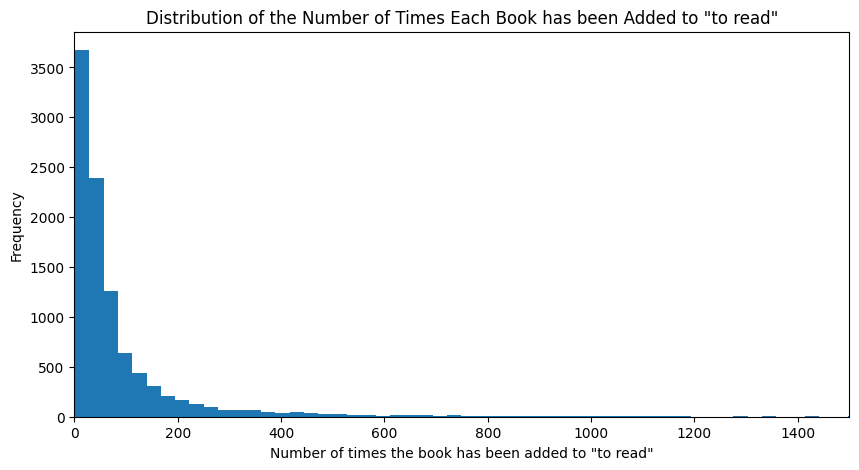

In [32]:
# Plot the distribution of the number of times each book has been added to 'to read'
plt.figure(figsize=(10, 5))
plt.hist(tr['book_id'].value_counts(), bins=100)
plt.xlabel('Number of times the book has been added to "to read"')
plt.ylabel('Frequency')
plt.title('Distribution of the Number of Times Each Book has been Added to "to read"')
plt.xlim(0,1500)
plt.show()


In [7]:
# Create a dictionary where the keys are user_ids and the values are sets of book_ids
user_books = defaultdict(set)

# Populate the dictionary
for _, row in tqdm(tr.iterrows(), total=tr.shape[0]):
    user_books[row['user_id']].add(row['book_id'])

# Create an empty graph
G_user_books = nx.Graph()

# Iterate over each user
for user_id, books in tqdm(user_books.items(), total=len(user_books)):
    # Generate all pairs of books for this user
    book_pairs = combinations(books, 2)
    
    # Add edges between all pairs of books
    for book_pair in book_pairs:
        G_user_books.add_edge(*book_pair, user_id=user_id)

# Print the number of nodes and edges in the graph
print(len(G_user_books.nodes()))
print(len(G_user_books.edges()))


100%|██████████| 48871/48871 [00:26<00:00, 1821.40it/s]

9986
6236948


In [40]:
#Rename the column 'book_1' to 'book_id'
edges_df

,book_1,book_2,user_id
0,8,3210,{'user_id': 51051}
1,8,139,{'user_id': 21526}
2,8,653,{'user_id': 46685}
3,8,3476,{'user_id': 28952}
4,8,672,{'user_id': 52737}
...,...,...,...
6236943,6656,4869,{'user_id': 40831}
6236944,6656,9112,{'user_id': 40831}
6236945,4869,9112,{'user_id': 40831}
6236946,6058,8376,{'user_id': 53414}


In [42]:
edges_df.query('book_1 == 672')

,book_1,book_2,user_id
20687,672,5286,{'user_id': 9}
20688,672,1582,{'user_id': 46623}
20689,672,1467,{'user_id': 26486}
20690,672,701,{'user_id': 51682}
20691,672,3650,{'user_id': 9}
...,...,...,...
23128,672,2946,{'user_id': 28224}
23129,672,2316,{'user_id': 28224}
23130,672,3505,{'user_id': 28224}
23131,672,2612,{'user_id': 28224}


In [35]:
tr

,user_id,book_id
0,9,8
1,15,398
2,15,275
3,37,7173
4,34,380
...,...,...
912700,39374,1049
912701,10492,5180
912702,21879,4827
912703,21879,6642


In [36]:
edges_df = edges_df.merge(tr, on='book_id')

KeyError: 'book_id'

In [38]:
#Prediction if a user will add a book to 'to read' based on the books they have already added to 'to read'
# Create a DataFrame with the edges of the graph
edges_df = pd.DataFrame(list(G_user_books.edges(data=True)), columns=['book_1', 'book_2', 'user_id'])

# Merge the edges DataFrame with the 'tr' DataFrame to get the target variable
edges_df = edges_df.merge(tr, on='book_id')

# Create a feature DataFrame with the number of times each book has been added to 'to read' by each user
features = edges_df.groupby(['user_id', 'book_id'])['book_id'].count().unstack().fillna(0)

# Create the target variable
target = edges_df.groupby(['user_id', 'book_id'])['book_id'].count().unstack().fillna(0).stack()

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Train a simple model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy_score(y_test, y_pred)

# Print the results 
print("Accuracy: ", accuracy_score(y_test, y_pred))


KeyError: 'book_id'

# 

# Prediction

In [45]:
edges_df

,book_1,book_2,user_id
0,8,3210,{'user_id': 51051}
1,8,139,{'user_id': 21526}
2,8,653,{'user_id': 46685}
3,8,3476,{'user_id': 28952}
4,8,672,{'user_id': 52737}
...,...,...,...
6236943,6656,4869,{'user_id': 40831}
6236944,6656,9112,{'user_id': 40831}
6236945,4869,9112,{'user_id': 40831}
6236946,6058,8376,{'user_id': 53414}


In [49]:
edges_df.query('book_1 == 8')

,book_1,book_2,user_id
0,8,3210,{'user_id': 51051}
1,8,139,{'user_id': 21526}
2,8,653,{'user_id': 46685}
3,8,3476,{'user_id': 28952}
4,8,672,{'user_id': 52737}
...,...,...,...
7205,8,4872,{'user_id': 12512}
7206,8,3997,{'user_id': 12512}
7207,8,5114,{'user_id': 12512}
7208,8,3414,{'user_id': 53186}


In [71]:
# Check how many times each book has been added to 'to read'
number_to_read =  tr['book_id'].value_counts()
number_to_read

book_id
47      2772
143     1967
113     1840
13      1812
11      1767
        ... 
6297       1
7951       1
4434       1
9124       1
8946       1
Name: count, Length: 9986, dtype: int64

In [80]:
# Can you show me the previous output for the node number 7210
tr['book_id'].value_counts().loc[8]


1498

In [73]:
# In number_to_read if the book_id has more than 50 times added to 'to read' then it will be '1' otherwise '0'
number_to_read = number_to_read.apply(lambda x: 1 if x >= 50 else 0)
number_to_read

book_id
47      1
143     1
113     1
13      1
11      1
       ..
6297    0
7951    0
4434    0
9124    0
8946    0
Name: count, Length: 9986, dtype: int64

In [74]:
number_to_read.sum()

4345

In [44]:
G_user_books.nodes()

NodeView((8, 3210, 139, 653, 3476, 672, 5286, 1582, 1467, 701, 3650, 2630, 1873, 2516, 473, 736, 230, 3560, 233, 6636, 112, 883, 638, 895, 5210, 398, 1491, 275, 666, 191, 346, 819, 7173, 483, 1629, 3109, 1574, 1591, 113, 850, 593, 8598, 7414, 312, 215, 380, 3581, 560, 498, 614, 2727, 2284, 2543, 4502, 4250, 2107, 5704, 10, 1847, 1167, 1239, 4475, 94, 2304, 256, 131, 771, 4359, 4629, 662, 2967, 1695, 32, 31, 36, 934, 550, 424, 809, 4394, 45, 178, 3508, 1084, 65, 323, 709, 2259, 1364, 467, 87, 6104, 730, 5851, 5596, 5090, 1642, 618, 115, 121, 9609, 140, 2452, 8988, 2465, 8098, 429, 1200, 181, 9525, 3644, 2109, 62, 1343, 1089, 6855, 2382, 6738, 1246, 6371, 1768, 2156, 2285, 755, 2299, 894, 6756, 7127, 1090, 3106, 2498, 38, 4232, 4684, 3404, 4332, 239, 658, 3986, 1365, 1238, 5269, 8697, 474, 6173, 5, 8456, 1683, 276, 282, 546, 682, 432, 1073, 4531, 5306, 446, 451, 2500, 5707, 7890, 471, 9186, 106, 2926, 3314, 1272, 362, 8859, 5283, 1319, 6932, 119, 2231, 7135, 8355, 4388, 430, 6064, 1205, 

In [75]:
# Now we want to labelize the nodes in the graph, we will use the number_to_read dictionary to do that
nx.set_node_attributes(G_user_books, number_to_read.to_dict(), 'to_read')


In [76]:
# Sow me the node 7210
G_user_books.nodes[7210]

{'to_read': 0}

In [77]:
G_user_books.nodes[47]

{'to_read': 1}

In [78]:
# Now we need to extract the graph_labels
graph_labels = nx.get_node_attributes(G_user_books, 'to_read')

In [84]:
graph_labels

{8: 1,
 3210: 1,
 139: 1,
 653: 1,
 3476: 0,
 672: 1,
 5286: 1,
 1582: 1,
 1467: 1,
 701: 1,
 3650: 1,
 2630: 1,
 1873: 1,
 2516: 1,
 473: 1,
 736: 1,
 230: 1,
 3560: 1,
 233: 1,
 6636: 0,
 112: 1,
 883: 1,
 638: 1,
 895: 1,
 5210: 1,
 398: 1,
 1491: 1,
 275: 1,
 666: 1,
 191: 1,
 346: 1,
 819: 1,
 7173: 1,
 483: 1,
 1629: 1,
 3109: 1,
 1574: 1,
 1591: 1,
 113: 1,
 850: 1,
 593: 1,
 8598: 0,
 7414: 0,
 312: 1,
 215: 1,
 380: 1,
 3581: 1,
 560: 1,
 498: 1,
 614: 1,
 2727: 1,
 2284: 1,
 2543: 1,
 4502: 0,
 4250: 1,
 2107: 1,
 5704: 0,
 10: 1,
 1847: 0,
 1167: 1,
 1239: 1,
 4475: 1,
 94: 1,
 2304: 1,
 256: 1,
 131: 1,
 771: 1,
 4359: 0,
 4629: 1,
 662: 1,
 2967: 1,
 1695: 1,
 32: 1,
 31: 1,
 36: 1,
 934: 1,
 550: 1,
 424: 1,
 809: 1,
 4394: 0,
 45: 1,
 178: 1,
 3508: 1,
 1084: 1,
 65: 1,
 323: 1,
 709: 1,
 2259: 1,
 1364: 1,
 467: 1,
 87: 1,
 6104: 0,
 730: 1,
 5851: 0,
 5596: 0,
 5090: 1,
 1642: 1,
 618: 1,
 115: 1,
 121: 1,
 9609: 0,
 140: 1,
 2452: 0,
 8988: 0,
 2465: 1,
 8098: 0,
 429

In [101]:
# Random split to train & test sets
from sklearn.model_selection import train_test_split
print(G_user_books.number_of_nodes())
print(len(graph_labels))
seed = 42
G_train, G_test, y_train, y_test = train_test_split(G_user_books, graph_labels, test_size=0.3, random_state=seed)

9986
9986


KeyError: 5130